In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

data = pd.read_csv("creditcard.csv")

# Feature matrix (X) and target variable (y)
X = data.drop(['Time', 'Class'], axis=1)
y = data['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and fitting the XGBoost model
model = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56860     4]
 [   21    77]]
Accuracy: 0.9995611109160493


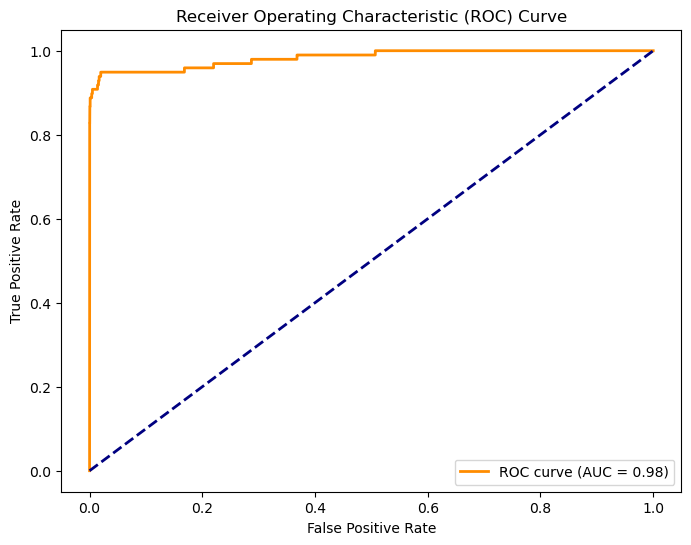

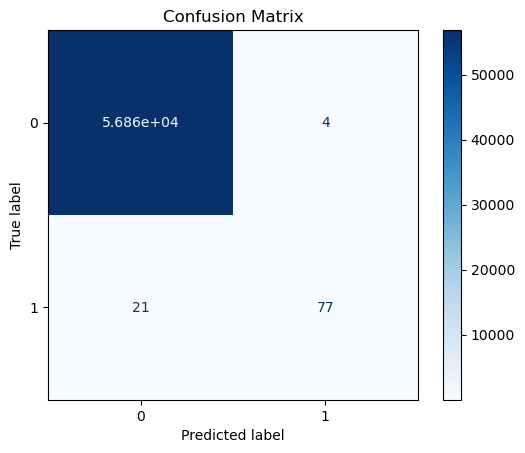

In [2]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

# Function to plot ROC Curve
def plot_roc_curve(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
plot_roc_curve(y_test, y_prob)

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".4g")
plt.title('Confusion Matrix')
plt.show()


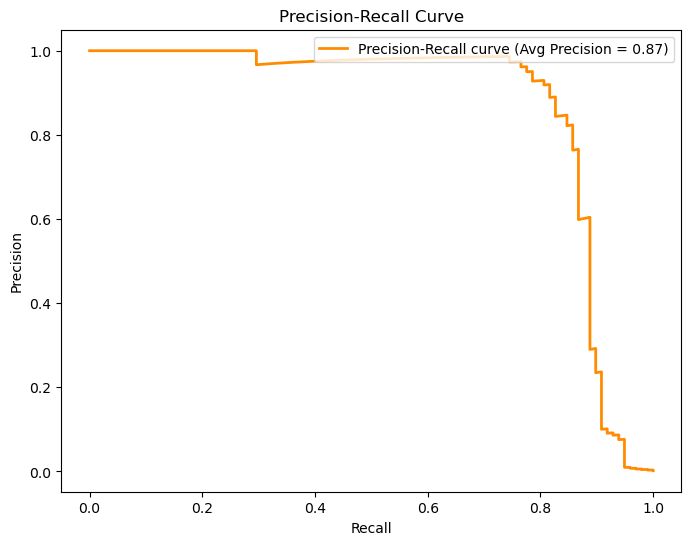

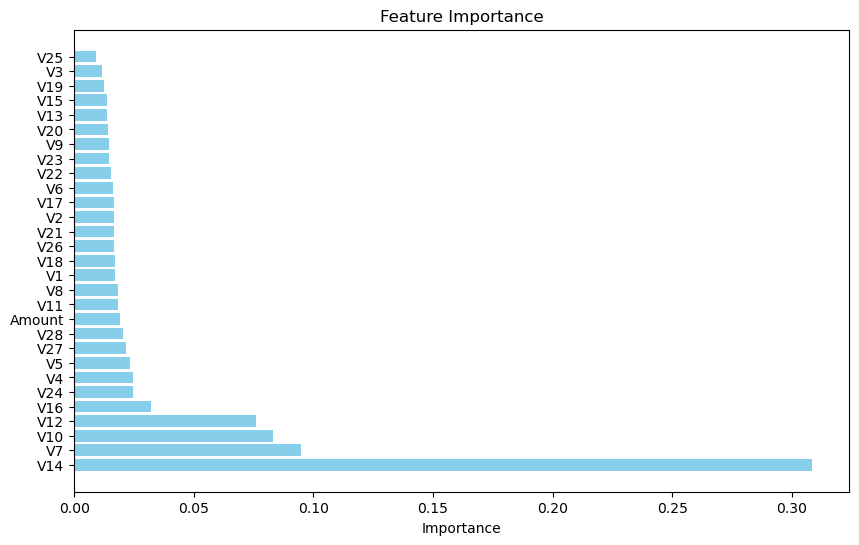

In [3]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    avg_precision = average_precision_score(y_true, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (Avg Precision = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='upper right')
    plt.show()

# Plot Precision-Recall Curve
plot_precision_recall_curve(y_test, y_prob)

# Plot Feature Importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


<b> Interpretation and Comparison: </b>

ROC Curve:
The ROC curve evaluates the trade-off between true positive rate and false positive rate.
A higher area under the ROC curve (AUC-ROC) indicates better discrimination ability.
The model appears to have good discrimination ability based on the ROC curve.

Precision-Recall Curve:
The Precision-Recall curve evaluates the trade-off between precision and recall.
A higher area under the curve (Avg Precision) indicates better model performance.
It complements the ROC curve, especially in imbalanced datasets.
The model achieves good precision and recall trade-off.

Confusion Matrix:
The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
It helps assess the model's ability to correctly classify instances.

Feature Importance: The feature importance plot illustrates the contribution of each feature to the model's predictions.
Higher bars indicate more important features.
It helps identify which features are influential in predicting credit card fraud.

In summary, the combined analysis of these visualizations suggests that the XGBoost model is performing well in distinguishing between normal and fraudulent transactions. It exhibits good discrimination ability, precision, recall, and identifies important features for prediction.